<a href="https://colab.research.google.com/github/aamleen/Stroke-Analysis-and-Prediction/blob/main/stroke_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('stroke-analysis-and-prediction')
jovian.set_colab_id('1vAvyTeiZ788Kayv92V_u4QZSttIZWZGQ')

# <center>Stroke -- Analysis & Prediction</center>

![Stroke Image](https://storage.googleapis.com/kaggle-datasets-images/1120859/1882037/04da2fb7763e553bdf251d5adf6f88d9/dataset-card.jpg?t=2021-01-26-19-57-05)

# Introduction

## About - Project
   <p style='text-align:justify;'>A stroke occurs when a blood vessel in the brain ruptures and bleeds, or when there’s a blockage in the blood supply to the brain. The rupture or blockage prevents blood and oxygen from reaching the brain’s tissues.</p>
    <p style='text-align:justify;'>According to the Centers for Disease Control and Prevention (CDC)Trusted Source, stroke is a leading cause of death in the United States. Every year, more than 795,000 U.S. people have a stroke. Without oxygen, brain cells and tissue become damaged and begin to die within minutes. </p>
   <p style='text-align:justify;'>In this project, we are going to deeply analyse the medical condition of Stroke. There are 11 clinical conditions that help in greatly predicting stroke. We will be analysing each of those conditions collectively & individually for around 5000+ cases. Using Data Analysis & Visualisation tools & libraries, we will try to see a relationship between the medical conditions varying them in multiple permutations.  </p>

## About - Dataset
        
   <p style='text-align:justify;'>According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.</p>

The dataset is taken from Kaggle. [Click Here](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) to find the original dataset.

## Downloading the Dataset

> - Found the dataset on Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
> - Downloaded the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aamleenahmed
Your Kaggle Key: ········


100%|██████████| 67.4k/67.4k [00:00<00:00, 6.06MB/s]

The dataset has been downloaded and extracted.

In [ ]:
data_dir = './stroke-prediction-dataset'

In [ ]:
import os
os.listdir(data_dir)

['healthcare-dataset-stroke-data.csv']

listdir() function helps in listing all the files in a particular directory. Here we find our dataset csv file.

## Saving & uploading notebook
   Now the setup is complete & we will be starting to work on the datasets. Everything has been synced accordingly, so now we should create a checkpoint for our current progress. Thus saving & uploading the notebook to jovian.
   ### Will keep moving this cell, wherever checkpoint is required till completion.

In [ ]:
#project_name = "stroke-analysis-and-prediction" # change this (use lowercase letters and hyphens only)
#!pip install jovian --upgrade -q
#import jovian
#jovian.commit(project=project_name)

## Data Preparation and Cleaning

Now beginning the project work on our downloaded dataset.
  TO perform any analysis & visualisation, first we need to filter out the unwanted entries, organize the data & prepare it for further processing. This step is also known as Data Pre-Processing & Cleaning. It is a very crucial step in Data Analysis, because it depends that what information you remove to improvise results, while retaining quality data for a rich analysis.



In [ ]:
import pandas as pd 

In [ ]:
stroke_df=pd.read_csv(data_dir+'/healthcare-dataset-stroke-data.csv')
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#Dropping the IDs, as they have no significance
stroke_df.drop(['id'],inplace=True,axis=1,errors='ignore')

#Converting datatypes to int for further arithmetic analysis
stroke_df[['age','hypertension','heart_disease','stroke']]=(stroke_df[['age','hypertension','heart_disease','stroke']]).astype(int)

stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#Checking for null values, so that they can be removed or substituted
stroke_df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

Thus, only BMI Column contains some null values. Lets analyse them & substitute accordingly

In [ ]:
print(stroke_df['bmi'].isnull().sum())

#removing & storing the entries containing null entries, so that we can make the dataset uniform. Later if needed, we can add it
null_bmi=stroke_df[stroke_df['bmi'].isnull()]
null_bmi

stroke_df=stroke_df[stroke_df['bmi'].isnull()==False]
stroke_df

201


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#Now checking the dataframe for description & statistics

display(stroke_df.info())

stroke_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   int64  
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 460.2+ KB


None

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.854145,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.575986,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


    Using info() function we find out some basic information about the dataset. We saw that now none of the column contains null values. 
    Using describe() helps in understanding the values of the dataframe. It clubs all the basic statistical operations on all the same type of values (in each column). It showed that our dataset contains a variety of data from various ages, ranging from 0-82. Also the glucose levels are well within acceptable limits, so thats correct too.
    One thing suspicious is such low level of BMI, so having a look at them once.

In [ ]:
display(stroke_df[stroke_df['bmi']<12])

#These bmi values are dangerouly low, resulting in organ-failures, life threatening. 
#Thus, assuming that these were entered incorrectly, & dropping these entries too.

stroke_df=stroke_df[stroke_df['bmi']>12]
display(stroke_df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1609,Female,1,0,0,No,children,Rural,122.04,10.3,Unknown,0
2187,Male,40,0,0,Yes,Private,Rural,60.96,11.5,never smoked,0
3307,Female,79,0,0,Yes,Self-employed,Urban,79.03,11.3,Unknown,0


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Creating dataset having patients with stroke only

This sub dataset will be helpful in analysing the reasons of having stroke

In [ ]:
having_stroke_df=stroke_df[stroke_df['stroke']==1]
display(having_stroke_df)

not_having_stroke_df=stroke_df[stroke_df['stroke']==0]
display(not_having_stroke_df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
243,Female,68,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,Male,57,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Gender Factor

Text(0.5, 1.0, 'Not Having Stroke')

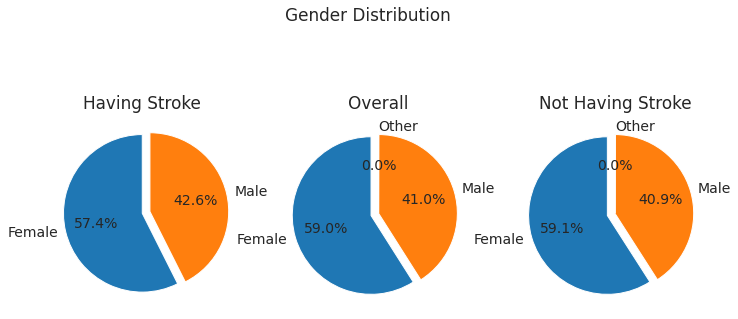

In [ ]:
gender_stroke=having_stroke_df.gender.value_counts()
figure, axis=plt.subplots(1,3,figsize=(12,6))
figure.suptitle("Gender Distribution")
axis[0].pie(gender_stroke,labels=gender_stroke.index,autopct ='%.1f%%',startangle=90,explode=[0,0.1])
axis[0].set_title("Having Stroke")

gender_stroke=stroke_df.gender.value_counts()
axis[1].pie(gender_stroke,labels=gender_stroke.index,autopct ='%.1f%%',startangle=90,explode=[0.1,0,0])
axis[1].set_title("Overall")

gender_stroke=stroke_df[stroke_df['stroke']!=1]
gender_stroke=gender_stroke.gender.value_counts()
axis[2].pie(gender_stroke,labels=gender_stroke.index,autopct ='%.1f%%',startangle=90,explode=[0.1,0,0])
axis[2].set_title("Not Having Stroke")

The above pie chart initially showed that females have more stroke cases than males. But after a thorough look of overall data that contains non-stroke patients too, it was found that the data is a bit bias towards female. 

### Age Factor

Text(0.5, 1.0, 'Overall')

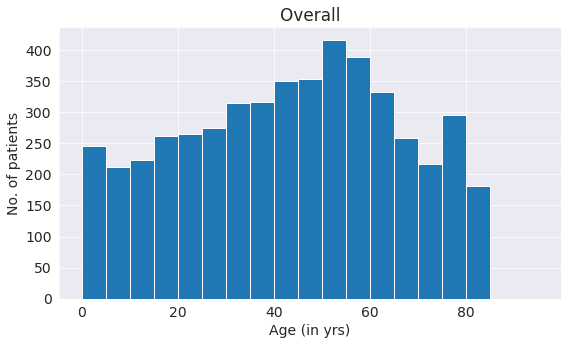

In [ ]:
plt.figsize=(20,8)
plt.hist(stroke_df.age,bins=np.arange(0,100, 5))
plt.xlabel("Age (in yrs)")
plt.ylabel("No. of patients")
plt.title("Overall")

[Text(0.5, 0, 'Age (in yrs)'),
 Text(0, 0.5, 'No. of patients'),
 Text(0.5, 1.0, ' Not Having Stroke')]

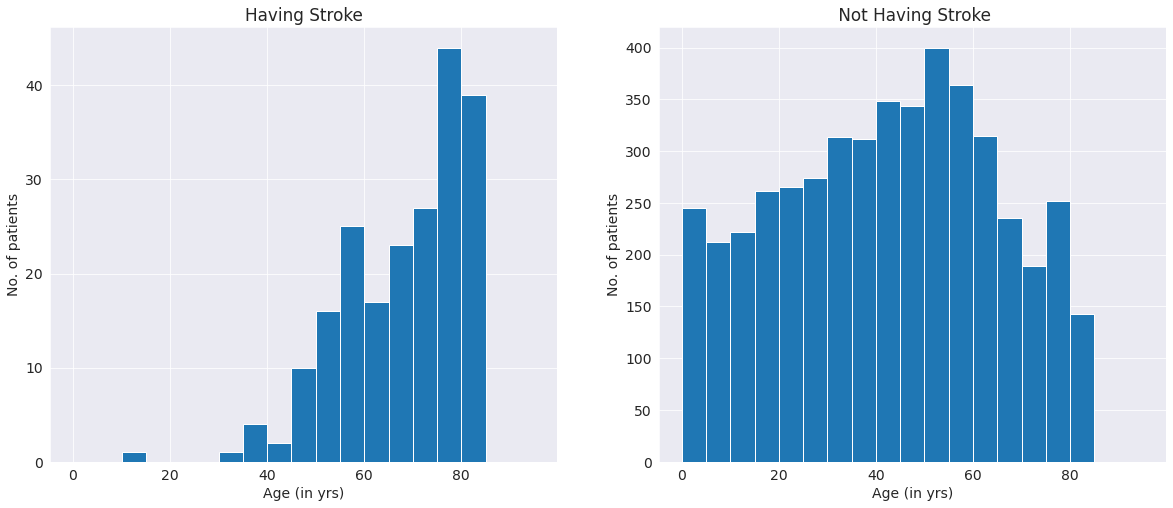

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

axes[0].hist(having_stroke_df.age,bins=np.arange(0,100, 5))
axes[0].set(xlabel="Age (in yrs)",ylabel="No. of patients",title="Having Stroke")

axes[1].hist(not_having_stroke_df.age,bins=np.arange(0,100, 5))
axes[1].set(xlabel="Age (in yrs)",ylabel="No. of patients",title=" Not Having Stroke")

A trend is seen in patients having stroke, as we go on increasing the age. Thus we can infer that with growing age, more are the chances of developing stroke problems

### Detailed Analysis visualisation

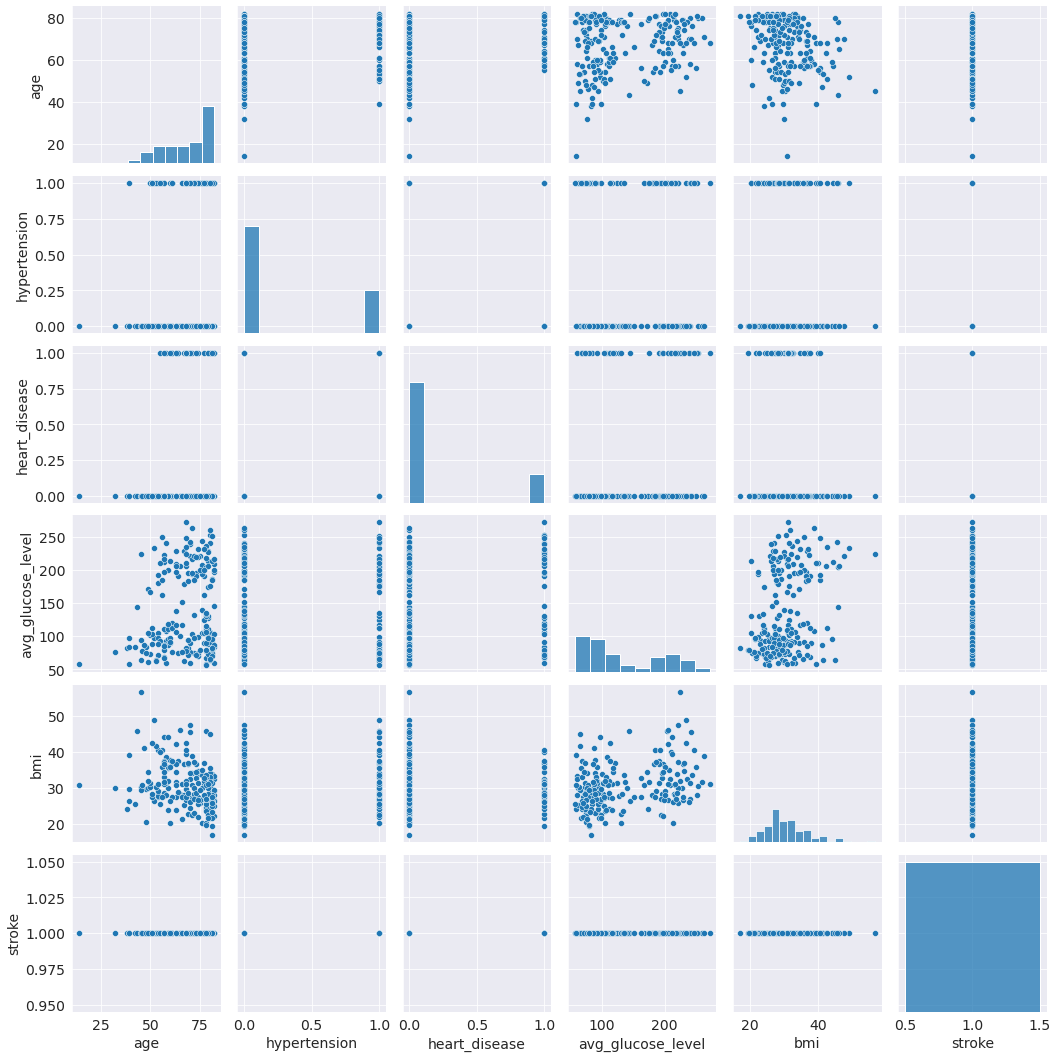

In [ ]:
sns.pairplot(having_stroke_df)

### HyperTension

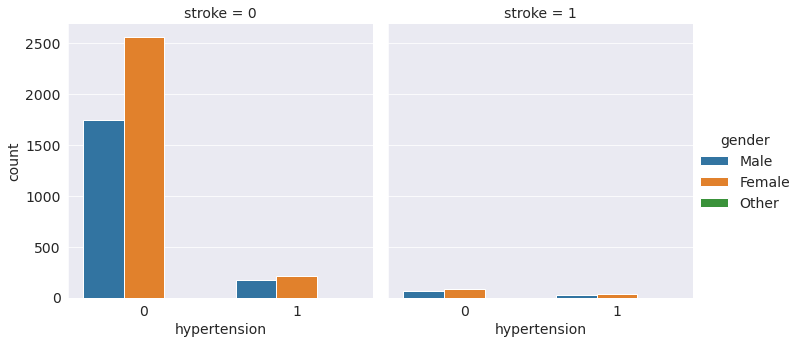

In [ ]:
sns.catplot(x="hypertension",hue="gender",col="stroke",
           data=stroke_df,kind="count")

Cases of hypertension have been reported more in females as compared to males. It might also be due to data-bias. The data shows that people who did not develop stroke have also had lesser occurences of hypertension.

### BMI

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

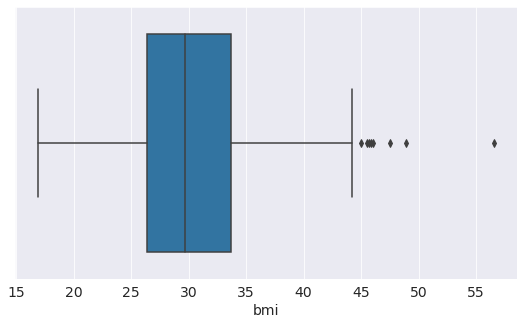

In [ ]:
sns.boxplot(having_stroke_df['bmi'])

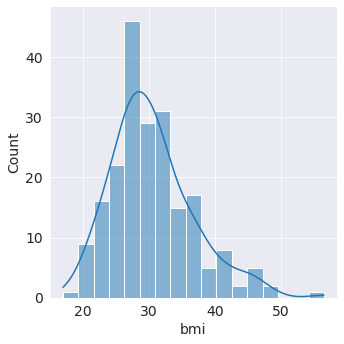

In [ ]:
sns.displot(data=having_stroke_df,x="bmi",kde=True)

Majority of the Stroke cases have BMI greater than 27, which generally comes under the category of obese & under-weight. 

### Avg. Glucose Level.

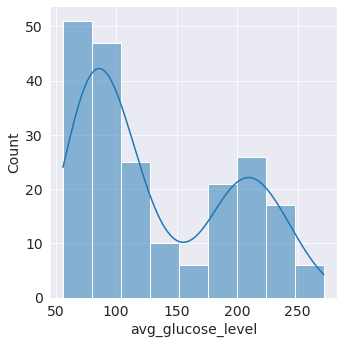

In [ ]:
sns.displot(data=having_stroke_df,x="avg_glucose_level",kde=True)

The below charts infer that abnormal range of glucose results in stroke. Either a very deficient in sugar/glucose results in more stroke conditions, or high diabetes conditions.

### Emotional/Social Analysis of Patients having Stroke

Private          127
Self-employed     53
Govt_job          28
children           1
Name: work_type, dtype: int64

Text(0.5, 1.0, 'Marital Status')

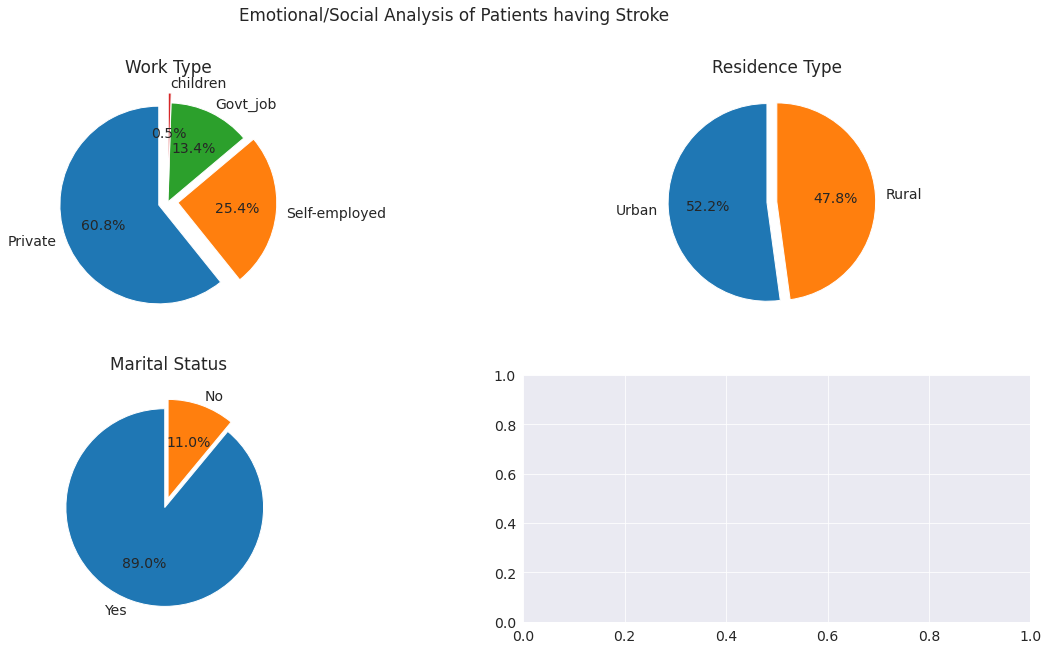

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(20,10))
fig.suptitle("Emotional/Social Analysis of Patients having Stroke")
work_stroke=having_stroke_df.work_type.value_counts()
display(work_stroke)
axes[0,0].pie(work_stroke,labels=work_stroke.index,autopct ='%.1f%%',startangle=90,explode=[0.1,0.1,0,0.1])
axes[0,0].set_title("Work Type")

residence_stroke=having_stroke_df.Residence_type.value_counts()
axes[0,1].pie(residence_stroke,labels=residence_stroke.index,autopct ='%.1f%%',startangle=90,explode=[0.1,0])
axes[0,1].set_title("Residence Type")

marital_stroke=having_stroke_df.ever_married.value_counts()
axes[1,0].pie(marital_stroke,labels=marital_stroke.index,autopct ='%.1f%%',startangle=90,explode=[0.1,0])
axes[1,0].set_title("Marital Status")

In this we start to also look for social & emotional factors that might have resulted in stroke. On combining the visualisation we can say that generally, the people living in urban areas, going for a private job & having a married life results in stroke conditions. A reason for this might be the extreme busy life due to these conditions resulting in hypertension & other required factors. 
  One data we also see is the contribution of rural areas, but typically they do not have an involvement in private work. Then we need to look for some other parameters for the contribution of people from rural background.

## Asking and Answering Questions



#### Q1: What does the data look like? How many stroke patients are there, and what is the age & gender classification?

In [ ]:
print("Total number of people participating in data are {}".format(stroke_df.shape[0]))
print("Out of them stroke patients are: {}".format(having_stroke_df.shape[0]))

Total number of people participating in data are 4905
Out of them stroke patients are: 209


In [ ]:
male=having_stroke_df[having_stroke_df['gender']=='Male'].count().gender
female=having_stroke_df[having_stroke_df['gender']=='Female'].count().gender
print(f"There are {male} male & {female} female stroke patients")

There are 89 male & 120 female stroke patients


In [ ]:
print("The age classification is :")
display(pd.cut(having_stroke_df['age'],bins=[0,10,20,30,40,50,60,70,80,np.inf]).value_counts())

The age classification is :


(70.0, 80.0]    81
(50.0, 60.0]    42
(60.0, 70.0]    42
(80.0, inf]     23
(40.0, 50.0]    15
(30.0, 40.0]     5
(10.0, 20.0]     1
(0.0, 10.0]      0
(20.0, 30.0]     0
Name: age, dtype: int64

#### Q2: How many patients are there who have hypertension & heartdisease, while having stroke

In [ ]:
hyper_heart=having_stroke_df[(having_stroke_df['hypertension']==1) & (having_stroke_df['heart_disease']==1)].count().hypertension
print(f"No. of patients having hypertension & heart-disease along with stroke are: {hyper_heart}")

No. of patients having hypertension & heart-disease along with stroke are: 11


In [ ]:
hyper_heart=having_stroke_df[(having_stroke_df['hypertension']==1) & (having_stroke_df['heart_disease']==0)].count().hypertension
print(f"No. of patients just having hypertension & NOT heart-disease along with stroke are: {hyper_heart}")

No. of patients just having hypertension & NOT heart-disease along with stroke are: 49


In [ ]:
hyper_heart=having_stroke_df[(having_stroke_df['hypertension']==0) & (having_stroke_df['heart_disease']==1)].count().hypertension
print(f"No. of patients having NO hypertension & just heart-disease along with stroke are: {hyper_heart}")

No. of patients having NO hypertension & just heart-disease along with stroke are: 29


#### Q3: What percentage of stroke patients are diabetic?

In [ ]:
having_diab=having_stroke_df[having_stroke_df['avg_glucose_level']>200].count().avg_glucose_level
print("{}% stroke patients have diabetes".format((having_diab/(having_stroke_df.shape[0])*100)))

23.444976076555022% stroke patients have diabetes


In [ ]:
having_diab=having_stroke_df[(having_stroke_df['avg_glucose_level']>140) & (having_stroke_df['avg_glucose_level']<200)].count().avg_glucose_level
print("{}% stroke patients have pre-diabetes".format((having_diab/(having_stroke_df.shape[0])*100)))

14.832535885167463% stroke patients have pre-diabetes


#### Q4: How many stroke patients are obese or underweight??

In [ ]:
having_stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
243,Female,68,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,Male,57,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [ ]:
having_diab=having_stroke_df[having_stroke_df['bmi']<18.5].count().bmi
print("{}% stroke patients are under-weight".format((having_diab/(having_stroke_df.shape[0])*100)))

0.4784688995215311% stroke patients are under-weight


In [ ]:
having_diab=having_stroke_df[having_stroke_df['bmi']>30].count().bmi
print("{}% stroke patients are obese".format((having_diab/(having_stroke_df.shape[0])*100)))

45.933014354066984% stroke patients are obese


#### Q5: What is the smoking history of the stroke patients?

In [ ]:
print("The smoking history of stroke patients is: ")
smoke_df=having_stroke_df.smoking_status.value_counts()
smoke_df=smoke_df[['never smoked','formerly smoked','smokes']]
print("{}% of stroke patients have never smoked".format(smoke_df['never smoked']*100/smoke_df.sum()))
print("{}% of stroke patients smoke or have smoked".format((smoke_df['formerly smoked']+smoke_df['smokes'])*100/smoke_df.sum()))

The smoking history of stroke patients is: 
46.666666666666664% of stroke patients have never smoked
53.333333333333336% of stroke patients smoke or have smoked


([<matplotlib.patches.Wedge at 0x7fabf4092220>,
 [Text(-1.193426275224861, 0.12543414847207549, 'never smoked'),
  Text(0.7778174593052022, -0.7778174593052025, 'formerly smoked'),
  Text(0.7551844750807374, 0.932575149034667, 'smokes')],
 [Text(-0.6961653272145021, 0.07316991994204403, '46.7%'),
  Text(0.4242640687119284, -0.4242640687119286, '31.7%'),
  Text(0.4405242771304301, 0.5440021702702225, '21.7%')])

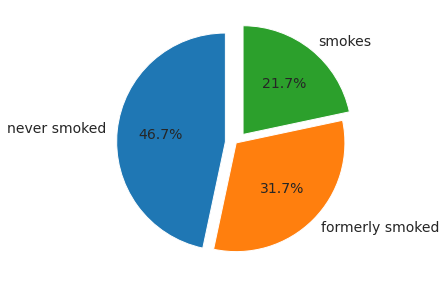

In [ ]:
plt.pie(smoke_df,labels=smoke_df.index,autopct ='%.1f%%',startangle=90,explode=[0.1,0,0.1])

#### Q6: If a patient has hypertension, is obese & has active smoking history, what are the chances of stroke?

([<matplotlib.patches.Wedge at 0x7fabf405f640>,
 [Text(-0.4485804963754457, -1.1130029372250367, '0'),
  Text(0.41119878834415874, 1.0202526924562836, '1')],
 [Text(-0.26167195621900996, -0.6492517133812713, '87.8%'),
  Text(0.22429024818772292, 0.5565014686125183, '12.2%')])

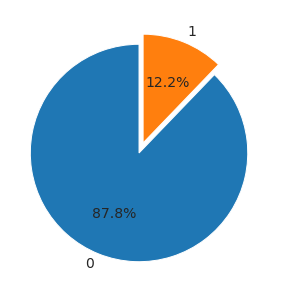

In [ ]:
major_factor_df=stroke_df[(stroke_df['hypertension']==1) & 
                          ((stroke_df['smoking_status']=='smokes') | (stroke_df['smoking_status']=='formerly_smoked')) & 
                          (stroke_df['avg_glucose_level']>30 )]
major_factor_df=major_factor_df.stroke.value_counts()
plt.pie(major_factor_df,labels=major_factor_df.index,autopct ='%.1f%%',startangle=90,explode=[0.1,0])

## Inferences and Conclusion

Through this project, we performed a detailed analysis of the various factors that contribute towards stroke. We observed the results graphically using rich python libraries like seaborn & matplotlib. Some of the inferences/observations are mentioned below:
- The dataset arranged was highly imbalanced. Out of ~3000 entries of people, only 209 stroke patients were found. This is a very huge imbalance. We reduced & uniformed the dataset accordingly to proceed further. Data required some cleaning & preprocessing, which was done properly.
- Majority of the analysis was performed on those 209 patients having stroke, in which the data was inclined more towards females creating a bias.
- The major contribution for stroke were found to be obesity, hypertension & smoking history. Approximately 45% of the stroke patients were found to be obese, having BMI 30+. While only a minute fraction of less than 1% stroke patients were underweight. Hypertension also contributed to approximately 30% cases of stroke. Having a smoking history was another major contribution, resulting in stroke. 
- In further analysis, it can be found that anyone having all these 3 symptoms had the highest probability to have stroke, while comparing any other parameters. The proper procedure for this study was done in another project linked here:
- We also had a look at the emotional & the social status of stroke patients to see if any pattern can be observed there. We saw that people living in urban areas & having a private life & also usually married, have a greater probability of having stroke. This can be attributed to the extremely busy lives found in such living environments leading to development of the 3 major factors. 
- A shocking factor was that the rural areas also contributed to around 45% of stroke cases. But these patients did not have a profound history of hypertension or obesity. So it can be said that it might have happened due to lack of information being spread & other societal work load.
- Many other conclusions can be inferred from the above analysis, & I will be analysing it further to squeeze more lemonade out of this dataset. Any suggestions are welcome whole-heartedly.


## References and Future Work

- The dataset can be found here: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
- More insights about stroke can be found here: https://www.nhs.uk/conditions/stroke/causes/#:~:text=The%20main%20cause%20of%20haemorrhagic,drinking%20excessive%20amounts%20of%20alcohol 

## Saving & uploading notebook
   As mentioned at the start of the project, saving a final report of the project on analysing & predicting stroke.

In [ ]:
project_name = "stroke-analysis-and-prediction" 
!pip install jovian --upgrade -q
import jovian
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>